In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [5]:
def regression_comparison(df: pd.DataFrame, Y: pd.DataFrame, 
                 learning_rate: float,
                 alpha: int, iters: int, name_of_dataset: str):
    
    X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=123)

    xg_reg_4 = xgb.XGBRegressor(objective ='reg:pseudohubererror', colsample_bytree = 0.3, learning_rate = learning_rate,
                    max_depth = 4  , alpha = alpha, n_estimators = iters, eval_metric=mean_absolute_error)
    evalset = [(X_train, y_train), (X_test, y_test)]
    xg_reg_4.fit(X_train, y_train, eval_set=evalset)
    results_4 = xg_reg_4.evals_result()
    
    xg_reg_6 = xgb.XGBRegressor(objective ='reg:pseudohubererror', colsample_bytree = 0.3, learning_rate = learning_rate,
                                max_depth = 6  , alpha = alpha, n_estimators = iters, eval_metric=mean_absolute_error)
    evalset = [(X_train, y_train), (X_test, y_test)]
    xg_reg_6.fit(X_train, y_train, eval_set=evalset)
    results_6 = xg_reg_6.evals_result()
    
    regr_2 = RandomForestRegressor(max_features = 2, min_samples_split = 50, random_state=0, warm_start=True)
    abs_error_2 = []
    
    regr_6 = RandomForestRegressor(max_features = 6, min_samples_split = 50, random_state=0, warm_start=True)
    abs_error_6 = []
    
    for i in range(1, int(iters / 10 + 1)):
        regr_2.set_params(n_estimators= i*10)
        regr_2.fit(X_train, y_train.values.ravel())
        y_hat_2 = regr_2.predict(X_test)
        abs_error_2.append(abs(y_test.to_numpy().T - y_hat_2).mean())
        
        regr_6.set_params(n_estimators=i)
        regr_6.fit(X_train, y_train.values.ravel())
        y_hat_6 = regr_6.predict(X_test)
        abs_error_6.append(abs(y_test.to_numpy().T - y_hat_6).mean())

    plt.figure()
    plt.plot(np.arange(1, iters + 1, 10), abs_error_2, '-o',label='RF m = 2', markerfacecolor="none", markersize=5, color="#FB8C00")
    plt.plot(np.arange(1, iters + 1, 10), abs_error_6, '-o',label='RF m = 6', markerfacecolor="none", markersize=5, color="#8BC34A")
    plt.plot(np.arange(1, iters + 1, 10), results_4['validation_1']['mean_absolute_error'][::10], '-o',label='GBM depth = 4', markerfacecolor="none", markersize=5, color="#80DEEA")
    plt.plot(np.arange(1, iters + 1, 10), results_6['validation_1']['mean_absolute_error'][::10], '-o',label='GBM depth = 6', markerfacecolor="none", markersize=5, color="#880E4F")
    plt.title(name_of_dataset)
    plt.xlabel("Number of Trees")
    plt.ylabel("Test Average Absolute Error")
    plt.ylim([abs_error_6[-1] - .05, abs_error_6[0]])
    plt.legend()
    
    importance(xg_reg_6, X_train.columns.values, "Gradient Boosted Trees")
    importance(regr_6, X_train.columns.values, "Random Forest")

def importance(xg_reg, cols, name):
    sorted_features = [x for _, x in sorted(zip(xg_reg.feature_importances_, cols), reverse=True)]
    importance = sorted(xg_reg.feature_importances_, reverse=True)
    importance = importance / max(importance) * 100
    plt.figure()
    plt.barh(range(len(xg_reg.feature_importances_)), importance)
    plt.xlabel(name + " Variable Importance")
    plt.yticks(range(len(xg_reg.feature_importances_)), labels = sorted_features)

In [ ]:
labels = ["median house value", "median income", "housing median age",
        "total rooms", "total bedrooms", "population", "households",
        "latitude", "longitude"]
df = pd.read_csv('cadata.txt', delim_whitespace=True,
                header=None, engine='python', names = labels)

df["AveOccupancy"] = df["population"] / df["households"]
df["AveRooms"] = df["total rooms"] / df["households"]
df["AveBedrooms"] = df["total bedrooms"] / df["households"]
df.drop(["total rooms", "total bedrooms", "households"], axis=1, inplace=True)
Y = df["median house value"].to_frame()
Y = (Y - 180000) / Y.std()
df = df.drop("median house value", axis=1)

regression_comparison(df, Y, 0.05, 0, 1000, "California Housing Data")



[0]	validation_0-mphe:0.47038	validation_0-mean_absolute_error:1.07362	validation_1-mphe:0.46399	validation_1-mean_absolute_error:1.06507
[1]	validation_0-mphe:0.44448	validation_0-mean_absolute_error:1.03879	validation_1-mphe:0.44026	validation_1-mean_absolute_error:1.03326
[2]	validation_0-mphe:0.42847	validation_0-mean_absolute_error:1.01741	validation_1-mphe:0.42640	validation_1-mean_absolute_error:1.01443
[3]	validation_0-mphe:0.41300	validation_0-mean_absolute_error:0.99562	validation_1-mphe:0.41440	validation_1-mean_absolute_error:0.99713
[4]	validation_0-mphe:0.39863	validation_0-mean_absolute_error:0.97454	validation_1-mphe:0.40122	validation_1-mean_absolute_error:0.97755
[5]	validation_0-mphe:0.38320	validation_0-mean_absolute_error:0.95124	validation_1-mphe:0.38814	validation_1-mean_absolute_error:0.95736
[6]	validation_0-mphe:0.36239	validation_0-mean_absolute_error:0.91926	validation_1-mphe:0.36821	validation_1-mean_absolute_error:0.92621
[7]	validation_0-mphe:0.35253	vali

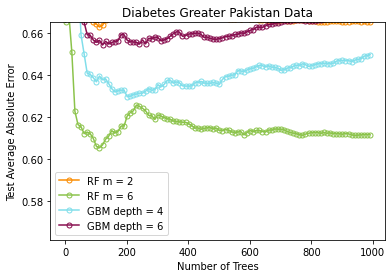

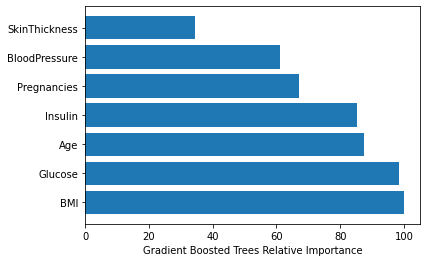

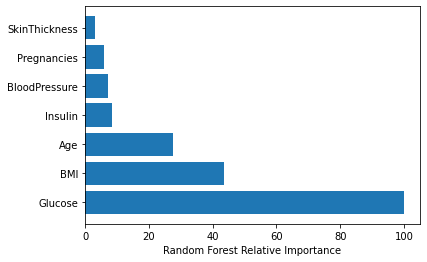

In [10]:
# Second dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
indian_df = pd.read_csv("diabetes.csv")
indian_df.drop(["DiabetesPedigreeFunction"], axis=1, inplace=True)
indian_df = indian_df.fillna(0)

Y2 = indian_df["Outcome"].to_frame()
indian_df.drop(["Outcome"], axis=1, inplace=True)
Y2 = (Y2 - Y2.mean()) / Y2.std()


# Recreate figure 15.3 on Diabetes Dataset 
regression_comparison(indian_df, Y2, 0.05, 0, 1000, "Diabetes Greater Pakistan Data")